# 🐶 End-to-End Multi-class Dog Breed Classification
This notebook builds an end-to-end multiclass image classifier using TensorFlow 
and TensorFlow hub.

## 1. Problem

Identifying the breed of a dog given the image of a dog.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification

## 3. Evaluation

The evaluation is a file with prediction probablities for each dog breed of 
each test image.

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:

* We're dealing with image (unstructured data) so it's probably best to use deep
learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes.)
* There are around 1000+ images in the training set (These images have labels)
* There are around 1000+ images in the test set (these images have no labels)

## 5.


In [1]:
#!unzip "drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog Vision/" 

[y]

In [2]:
# Getting our workspace ready

import tensorflow as tf
print("TF version:",tf.__version__)

import tensorflow_hub as hub
print("Tensor FLow hub:", hub.__version__)

TF version: 2.8.0
Tensor FLow hub: 0.12.0


In [3]:
print("Yay! We got a GPU available God damn we are RICH MONEY ! MONEY! MONEY! $$$$$$$$" if tf.config.list_physical_devices("GPU") else "not avilable :(")

Yay! We got a GPU available God damn we are RICH MONEY ! MONEY! MONEY! $$$$$$$$


# Getting our data ready!
We will load our Dog Image data which we will turn into tensors ( Tensor is numericall representation of data, Which is similar to numpy array"Matrix")
Lets check our data labels

In [4]:
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [5]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


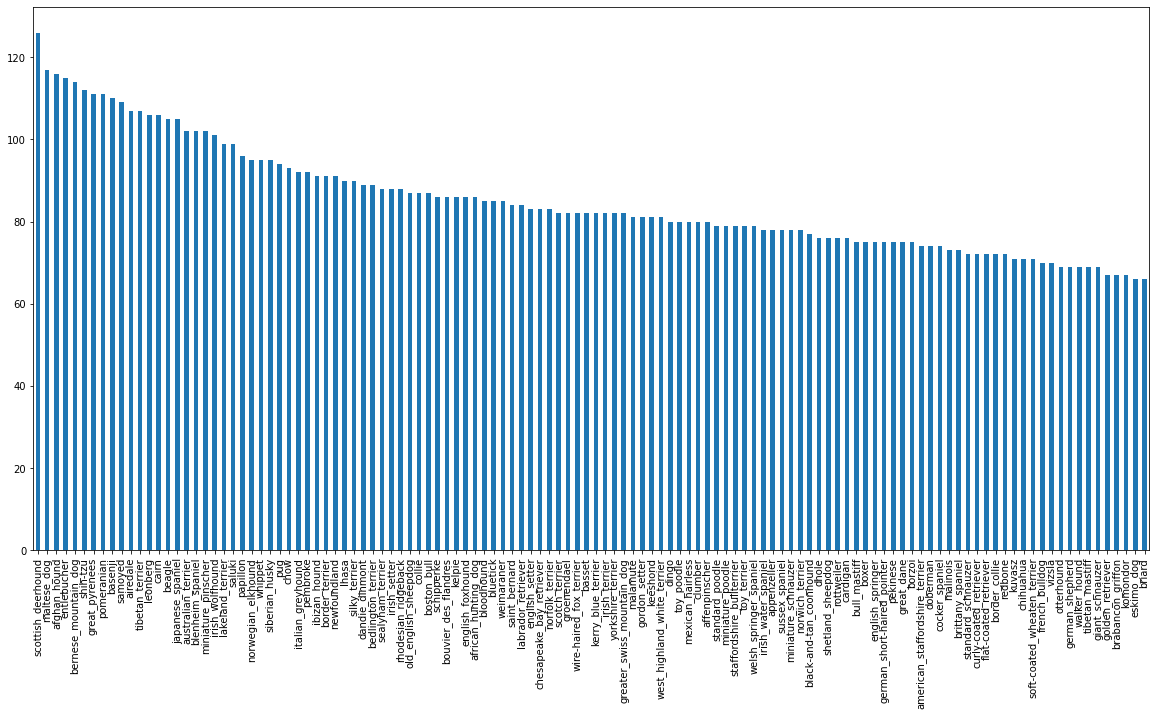

In [6]:
# How many images are there of each breed
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [7]:
# Mean & Median

print("Mean:", labels_csv["breed"].value_counts().mean())
print("Median:", labels_csv["breed"].value_counts().median())

Mean: 85.18333333333334
Median: 82.0


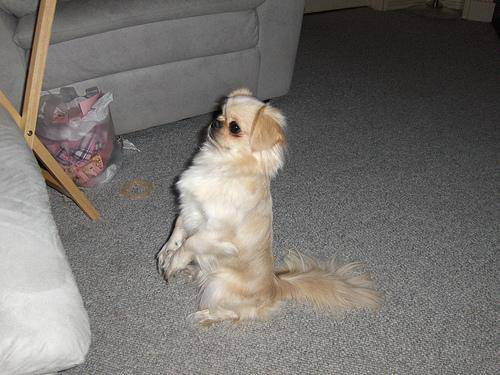

In [8]:
from IPython.display import Image
Image("drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg")

### Getting images and their labels
let's get a list of all out images file pathnames.

In [9]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [10]:
filenames = ["drive/MyDrive/Dog Vision/train/" + fnames + ".jpg" for fnames in labels_csv["id"]]

In [11]:
# Checking first 10
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [12]:
import os
if len(os.listdir("drive/MyDrive/Dog Vision/train/")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed👌")
else:
  print("Filenames do not match actual amount of files, check the target directory.")


Filenames match actual amount of files!!! Proceed👌


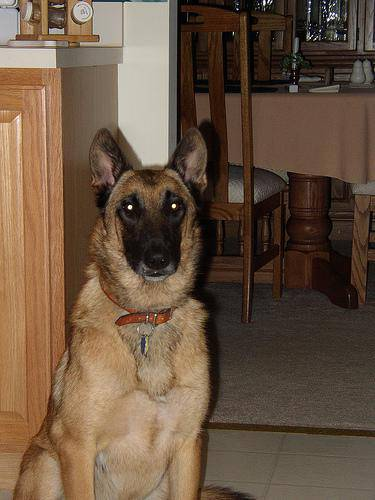

In [13]:
Image(filenames[199])

In [14]:
labels_csv["breed"][199]

'malinois'

Since we've got our training image filepath in a list, let's prepare out labels.


In [15]:
import numpy as np
labels = labels_csv.breed.to_numpy()
# labels = np.array(labels)  # does samething as above

In [16]:
len(labels)

10222

In [17]:
#  See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("We are good to go!!!")
else:
  print("Mission Abort")

We are good to go!!!


In [18]:
#  find the unique labels values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [19]:
# TUen a single label into an array of booleans
print(labels[0])
labels[0]== unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
#  tuen every label into a boolean array
boolean_labels =  [label == unique_breeds for label in labels]
boolean_labels[:1]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

In [21]:
len(boolean_labels)

10222

In [22]:
#Example: Turning bpp;ean array into integers 
print(labels[0]) #orignal labels
print(np.where(unique_breeds ==labels[0])) #index where albel occurs
print(boolean_labels[0].argmax()) #index where labels occurs in boolean arrat
print(boolean_labels[0].astype(int)) # there will be a 1 where sample occours

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


# Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own. 

In [23]:
#  Setup X & Y variable
x = filenames
y = boolean_labels


In [24]:
len(filenames)

10222

we're going to start off experimenting with ~1000 images and icrease as needed.

In [25]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [26]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [27]:
# Let's have a geez at the training data
x_train[:5], y_train[:2]

(['drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

## Preprocessing Images (turning images into Tensors)

To preprocess our images into Tensor we're going to write a fuction whch does a few things:
1. Take an image filepath as input 
2. Use Tensor FLow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image convert color value to 0-1
5. Resize the `image` to be a shape of (224,224)
6. Return the modified `image`

In [28]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [29]:
image.max(), image.min()

(255, 0)

In [30]:
# turn image into a Tensor
tf.constant(image)[:2]


<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

## Now we have seen what image looks like in Tensor, lets make a function to preprocess them
1. Take an image filepath as input 
2. Use Tensor FLow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Resize the `image` to be a shape of (224,224)
5. Return the modified `image`

In [31]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to precies 10,000+ images in one go... they all might not fit into memory.
So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be.)

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this:(`image`,`label`)

In [32]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

Now we've got a way to turn our data into tuples of Tensors in the form:(`image,label`), let's make a function to turn all of our data into batches!

In [33]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [34]:
# Create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [35]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches
Our data is now in batches, however, these can be a little hard to understand/comprehend,let's visualize them!

In [36]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [37]:
train_images,train_labels = next(train_data.as_numpy_iterator())
train_images,train_labels

(array([[[[0.48598498, 0.51603574, 0.43764812],
          [0.46068385, 0.49857774, 0.40882668],
          [0.44971523, 0.48977008, 0.3924259 ],
          ...,
          [0.77107733, 0.7200969 , 0.6848028 ],
          [0.8197209 , 0.77717894, 0.69577116],
          [0.8048407 , 0.765625  , 0.66758573]],
 
         [[0.66865057, 0.6921362 , 0.6452962 ],
          [0.58669555, 0.61802435, 0.5606844 ],
          [0.49245998, 0.52473414, 0.46590188],
          ...,
          [0.7454534 , 0.6983946 , 0.6513358 ],
          [0.760152  , 0.7170147 , 0.637467  ],
          [0.7514793 , 0.708342  , 0.62212145]],
 
         [[0.6408579 , 0.6577784 , 0.64645135],
          [0.63859755, 0.6633612 , 0.6481126 ],
          [0.6416577 , 0.66736674, 0.651803  ],
          ...,
          [0.7490196 , 0.69658613, 0.65221465],
          [0.7461135 , 0.7029762 , 0.6308227 ],
          [0.7483269 , 0.70518965, 0.62912166]],
 
         ...,
 
         [[0.6683807 , 0.6174003 , 0.5821062 ],
          [0.62699

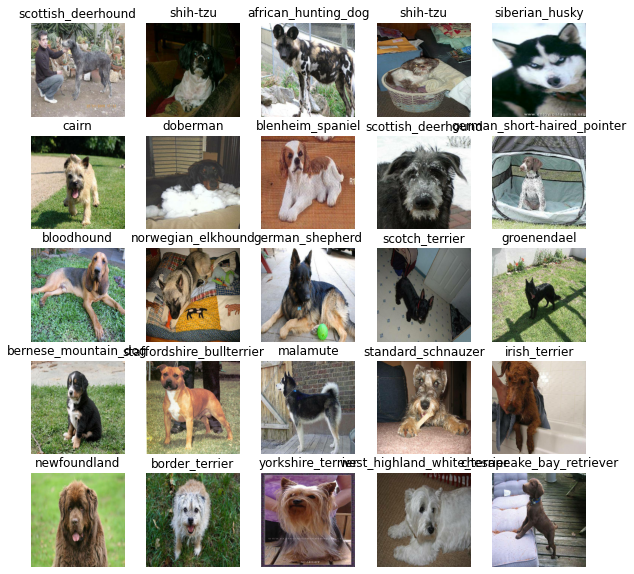

In [38]:
# # Now let's visualize the data in a training batch
show_25_images(train_images, train_labels)

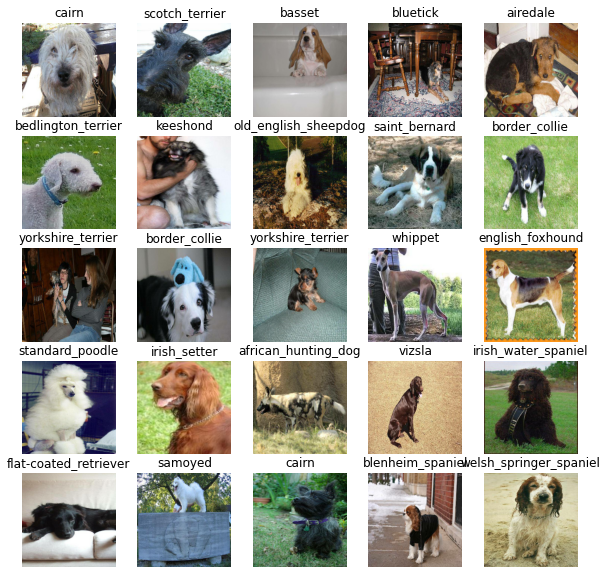

In [39]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

In [40]:
#  Building a model
# Setup input shape
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3]

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TFHUB
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Now we've got out inputs, outputs and model ready to go. let's put them together into a Keras deeo learning model!
Knowing this, let's create a fuction which:
* Takes the nput shape, output shape and the model we've chosen as parameters.
* Defines the layers in Keras model in sequential fashion (do this first, then this, then that).
* Compliles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

 


In [41]:
# build a function which builds Keras Model
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
                               hub.KerasLayer(MODEL_URL), #Layer 1 (input layer)
                               tf.keras.layers.Dense(units = OUTPUT_SHAPE,
                                                     activation = "softmax") #layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model


In [42]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks
Callbacks are helper function a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving. 

We'll create a two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

### TensorBoard Callback 

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension. ✅
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` fuction.✅
3. Visualize our models training logs with the `tensorboard` magic function (we'll do this after model training.) ✅

In [43]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [44]:
import datetime
# create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/Dog Vision/logs",
                        #  Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping callback
Early stopping helps our model from overfitting if a certain evaluation metric stops improving.


In [45]:
# Create early stopping callback]
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience = 3)

# Training a model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [46]:
NUM_EPOCHS = 100 #@param {type:"slider",min:10, max:100}

In [47]:
#  check to make sure we are running on GPU
print("GPU","available👌)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available👌)


LET'S CREATE A SIMPLE FUNCTION WHICH TRAINS A MODEL. THE FUNCTION WILL:

* Create a model using `create_model()`.
* Setup a TensorBoard vallback using create_tensorboard_callback() (we do this here so it creates a log directory of the current data and time).
* Call the `fit()` on our model passing it the training data, validation data, number of epochs to train for and the callbacks we'd like to use.
* Return the fitted model.


In [48]:
#  Build a function to train and return a trained model
def train_model():
  """ 
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  #  Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq =1, # check validation metrics every epochs)
            callbacks = [tensorboard,early_stopping])
  
  return model



In [49]:
# # Fit the model to the data
# model = train_model()

## Checking the TensorBoard Logs
The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and visualize its contents

In [50]:
%tensorboard --logdir drive/MyDrive/Dog\ Vision/logs

<IPython.core.display.Javascript object>

In [51]:
### Making and evaluating predictions using a trained model

In [ ]:
 # Make a prediction on the validation dataset (not on trained data)
predictions = model.predict(val_data, verbose=1)
predictions

In [ ]:
predictions.shape

In [ ]:
predictions[0]

In [ ]:
#  First prediction
index = 1
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

Having the above functionality in great but we want to be able to do it at scale.
And it would be even better if we could see the image the prediction is being made on!
NOTE: Prediction probabilities are also known as confidence levels.

In [ ]:
#  Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilites into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]
  
#  Get a predicted label based on an array of prediction probablities
pred_label = get_pred_label(predictions[82])
pred_label

Now since our validation data is still in a batch dataset, we'll have to unbatch it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [ ]:
#  Create a function to unbatch a datset 
def unbatchify(data):

  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays of images and labels.
  """

  images = []
  labels = []

 # Loop through unbatch data
  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images,labels

  # UNbatify the validation data
val_images,val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

 



In [ ]:
get_pred_label(labels[0])

Now we've got to get:
* Predicitons labels
* Validation labels*
* Validation images
Lets make  some function to maek athese all a bit more visual

We'll create a function which:
* Takes an array of prediction probablities, an array og truth labels and an array of images and integers.
* Convert the prediction probablities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and the targer image on a plot


In [ ]:
def plot_preds(prediction_probabilities, labels, images, n=1):

  """
  View the prediction, ground truth and image for sampel n
   """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

#  Get the pred label
  pred_label = get_pred_label(pred_prob)

# Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

# Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color = color)

In [ ]:
plot_preds(prediction_probabilities=predictions,
           labels = val_labels,
           images = val_images,
           n=28)

Now we've got one function to visualize our models top predictions, let's make another to biew our model top 10 prediction

This function will:
* Take an input of prediction probabilities array and a ground thruth array and an integer
* Fund the prediction using get_pred_label()
* Find the top 10
   * Prediction probablities index
   * Prediction probablities valies
   * Prediction labels
*Plot the top 10 prediction probablities values and labels, coloring the true label green


In [ ]:
def plot_pred_conf(prediction_probabilities,labels, n =1):
  """
  Plus the top 10 highesst prediction condidence along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

# Find the top10 prediction condidence indexes
  top_10_pred_indexes=pred_prob.argsort()[-10:][::-1]
# Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup PLOT
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  # Chsnge color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=10)

Now we've got some function to help us visualize our predictions and evaluate our model, let's check out 

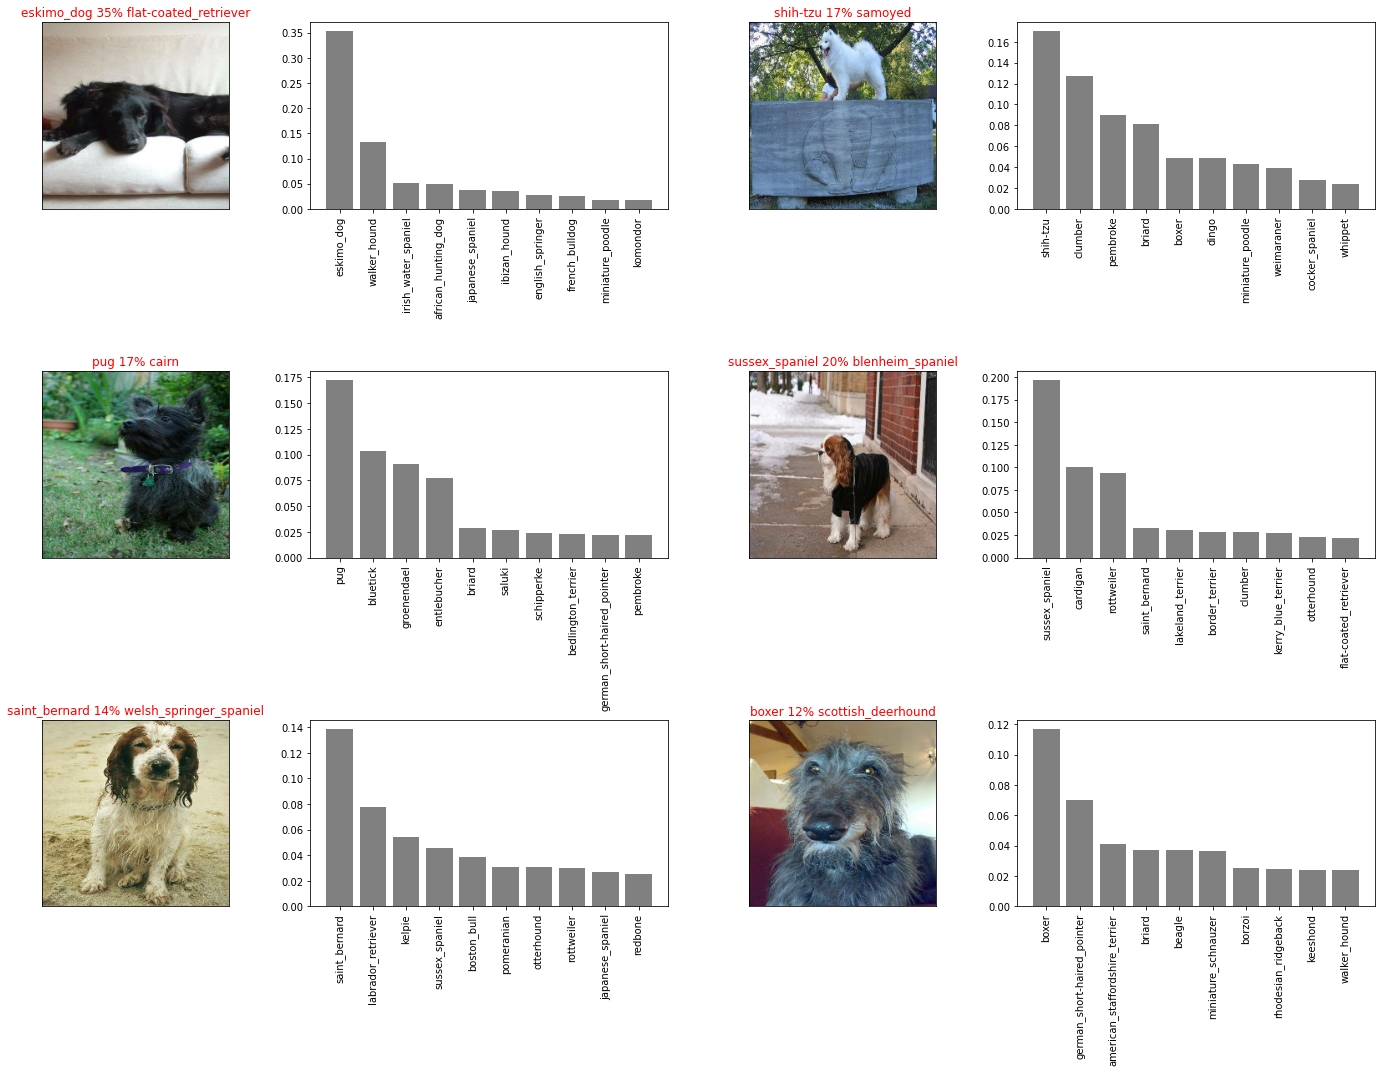

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize =(10*num_cols, 5*num_rows))
for i in range(num_images): 
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_preds(prediction_probabilities = predictions,
            labels = val_labels,
            images = val_images,
            n = i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities = predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
  plt.tight_layout(h_pad = 1.0)
  
plt.show()

# Saving and reloading a model


In [ ]:
#  Create a function to save a model
def save_model(model,suffix=None):
  """
  Save a given model in a models directory and appends a suffix(string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/Dog Vision/model",
                          datetime.datetime.now().strftime("%y%m%d=%H%M%s"))
  model_path = modeldir + "_" + suffix + ".h5" #save format of model
  print(f"Saving model to : {model_path}...")
  model.save(model_path)
  return model_path

# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model
  

Now we've got function to sace and load a trained model,lets make sure it works

In [ ]:
#  Save our model trained on 1000 images
save_model(model,suffix = "1000-images-mobilenetv2-Adam")


Saving model to : drive/MyDrive/Dog Vision/model/220427=08421651048978_1000-images-mobilenetv2-Adam.h5...


'drive/MyDrive/Dog Vision/model/220427=08421651048978_1000-images-mobilenetv2-Adam.h5'

In [ ]:
loaded_1000_image_model = load_model("drive/MyDrive/Dog Vision/model/220424=13391650807577_1000-images-mobilenetv2-Adam.h5")

Loading saved model from: drive/MyDrive/Dog Vision/model/220424=13391650807577_1000-images-mobilenetv2-Adam.h5


In [ ]:
#  Evaluate the pre_saverd model
model.evaluate(val_data)

7/7 [==============================] - 2s 113ms/step - loss: 5.8986 - accuracy: 0.0050


[5.898622035980225, 0.004999999888241291]

# Training a BIG DAWG model🐶 (onthefull data)

In [ ]:
# Create a databatch with the full dataset
full_data = create_data_batches(x,y)

Creating training data batches...


In [ ]:
# Create a model for fullmodel
full_model = create_model()

In [ ]:
# create a full model callback
full_model_tensorboard =  create_tensorboard_callback()
#   No validation set when train ing on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy",
                                                             patience = 3)

**Note:** Running the cell below will take a little while(maybe 30 min)

In [ ]:
# Fit the full model to the full data
full_model.fit(x = full_data,
               epochs = NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

In [ ]:
save_model(full_model,suffix = "full-image-set-mobilev2-Adam")

In [ ]:
loaded_full_model = load_model("drive/MyDrive/Dog Vision/model/220424=15391650814794_full-image-set-mobilev2-Adam.h5")

## Making predictions on the test dataset
Since our model has been trained on images in the form of Tensor batches, to make prediction on the test data, we'll have to ger it into the same format.

Luckily we created`create_data_batches()` earlier which can take a list of filename as input and cover them into Tensor batches.

To make predictions on the test data, we'll 
* Get the test image filenames
* Convert the filenames into test data btaches using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doesn;y have the labels)
* Make the predictions array by passing the test batches to the predict() method called on our model.

In [ ]:
# Load test image filenames
test_path = "drive/MyDrive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

In [ ]:
len(test_filenames)

In [ ]:
# Create test databatch 
test_data = create_data_batches(test_filenames, test_data = True)

**Note**: Calling predict(0 on our full model and passing it the test batch will take a long time to run (about an ~1hr)

In [ ]:
# Make prediction on test data batch using the full model
test_predictions = loaded_full_model.predict(test_data,
                                              verbose=1)

In [ ]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetxt("drive/MyDrive/Dog Vision/preds_array.csv", test_predictions, delimiter = ",")

In [ ]:
# Load Predictions (NumPy array) from CSV file
test_predictions = np.loadtxt("drive/MyDrive/Dog Vision/preds_array.csv", delimiter=",")

# Making predictions on custom images
To make predictions on custom images, we'll
* Get the filepath of our own images.
* Turn the filepaths into data batches using `create_data_batches()`. And since our custom images won't have labels, we set the `test_data` parameter to `True`.
* Pass the custom images data batch to our model's `predict()` method.
* Convert the prediction output probablities to predictions labels.
* Compare the predicted labelsto the custom images.



In [ ]:
# Get the custom image file path
custom_path = 'drive/MyDrive/Dog Vision/DOGGIE/'

In [ ]:
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

In [ ]:
#  Turn the images to data_batches
custom_data = create_data_batches(custom_image_paths, test_data = True)
custom_data



In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
custom_preds.shape

In [ ]:
#  Get the custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

In [ ]:
# Get cystom images(unbatchify wont work since trhere aren't labels)
custom_images = []
#  Loop through unbatched data
for image  in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)
  

In [ ]:
# Check custom image predictions
plt.figure(figsize = (24,24))
for i, image in enumerate(custom_images):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)